In [1]:
from src.soilpulse.dataset_loader import *
import matplotlib.pyplot as plt

In [2]:
RIES = load_sp_datapackage({"sourcedir": "catalogue/temp_4/"})
#sorted(get_dataset_concepts(TUBAF, vocab = optio))
#RIES

Text(0.5, 0, 'Experiment No')

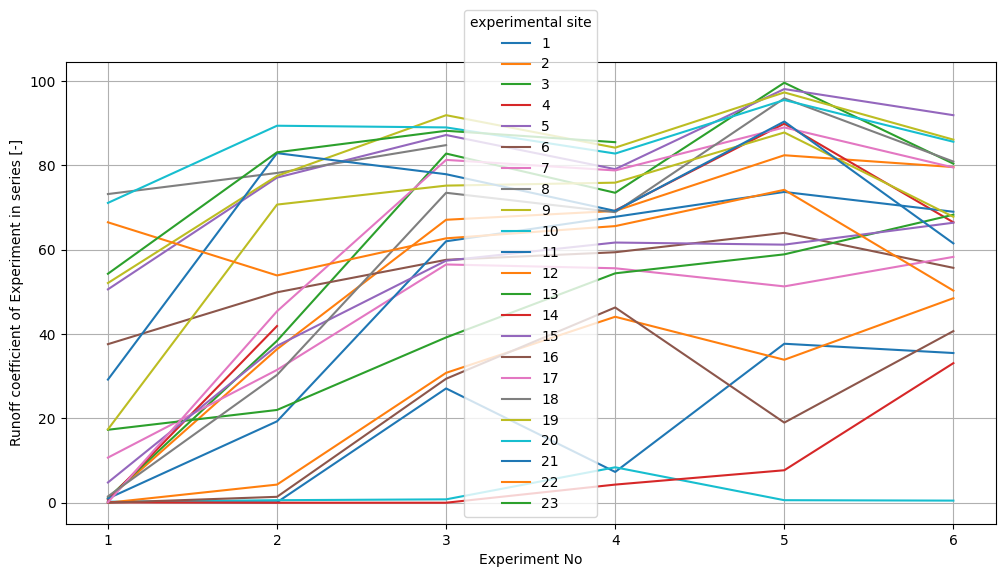

In [32]:
# select mean overland flow Runoff coefficients from RIES data
a = view_sp_resource(RIES.resources[1], fields = ['RC_OF_mean_selected'])
# without .open() and .close() the first call gets only the last experiments - for whatever frictionless reason
a.open()
a.close()

# convert this to pandas and draw a figure
b = a.to_pandas()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
for x in b.index.levels[0]:
    site_data = b.xs(x, level="Site_number")
    #site_data = b[b.index.get_level_values("Site_number") == x].reset_index()
    ax1.plot(site_data, label = x)
    #ax1.plot(site_data.Experiment_number, site_data.RC_OF_mean_selected, label=x)
ax1.grid()
ax1.legend(title = "experimental site")
ax1.set_ylabel("Runoff coefficient of Experiment in series [-]")
ax1.set_xlabel("Experiment No")

In [72]:
a_time = view_sp_resource(RIES.resources[2],
                          fields = ['Experiment_number', 'P_mean_selected', 'Q_OF_mean_selected'],
                          #row_filters = ['P_mean_selected > 1.5']
                         )
# without .open() and .close() the first call gets only the last experiments - for whatever frictionless reason
a_time.open()
a_time.close()
a_time

{'name': '3_experiment_time_series',
 'type': 'table',
 'data': [],
 'scheme': '',
 'format': 'inline',
 'mediatype': 'text/csv',
 'extrapaths': [],
 'schema': {'fields': [{'name': 'Date_time',
                        'type': 'datetime',
                        'description': ' Date and time in Central European '
                                       'Summer Time (CEST) = UTC +2 hours ',
                        'format': '%Y-%m-%d %H:%M',
                        'unit': 'yyyy-mm-ddhh',
                        'concept': ''},
                       {'name': 'Site_number',
                        'type': 'integer',
                        'description': ' ID number of experiment location ',
                        'unit': '1to23',
                        'concept': ''},
                       {'name': 'Experiment_number',
                        'type': 'string',
                        'description': ' ID number of experiment ',
                        'unit': '1to6',
                 

In [73]:
b_time = a_time.to_pandas()
b_time = b_time.reorder_levels(['Site_number','Date_time']).sort_index()
b_time.head()

Experiment_number  P_mean_selected  \
Site_number Date_time                                                
1           2016-08-16 03:19:00              None              0.0   
            2016-08-16 03:20:00              None              0.0   
            2016-08-16 03:21:00              None              0.0   
            2016-08-16 03:22:00              None              0.0   
            2016-08-16 03:23:00              None              0.0   

                                 Q_OF_mean_selected  
Site_number Date_time                                
1           2016-08-16 03:19:00                 0.0  
            2016-08-16 03:20:00                 0.0  
            2016-08-16 03:21:00                 0.0  
            2016-08-16 03:22:00                 0.0  
            2016-08-16 03:23:00                 0.0

Text(0.5, 0, 'Date')

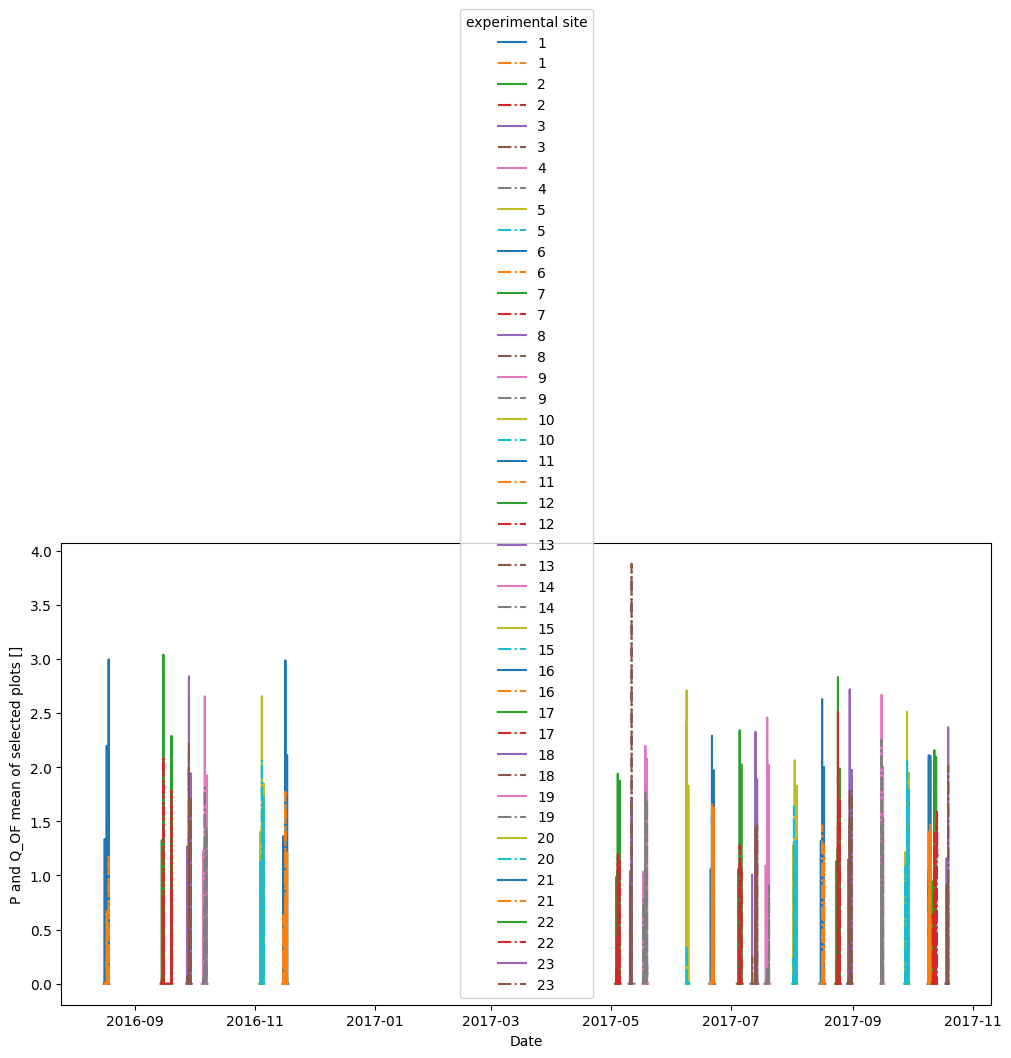

In [76]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111)
for x in b_time.index.levels[0]:
    site_data = b_time.xs(x, level="Site_number")
    #site_data = b[b.index.get_level_values("Site_number") == x].reset_index()
    ax1.plot(site_data.index, site_data.P_mean_selected, label = x)
    ax1.plot(site_data.index, site_data.Q_OF_mean_selected, label = x, linestyle = 'dashdot')
#ax1.grid()
ax1.legend(title = "experimental site")
ax1.set_ylabel("P and Q_OF mean of selected plots []")
ax1.set_xlabel("Date")

<AxesSubplot: xlabel='Date_time'>

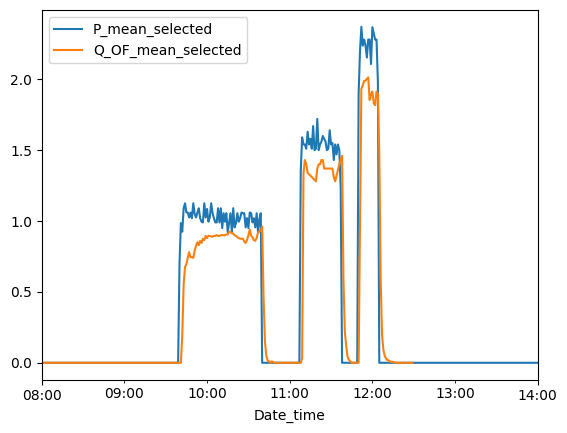

In [83]:
import pandas as pd
tst = pd.to_datetime('2017-10-19 08:00')
tnd = tst+pd.Timedelta(hours=6)

site_data.loc[tst:tnd].plot()

In [97]:
agg = b_time.pivot_table(values=["P_mean_selected","Q_OF_mean_selected"], columns=['Site_number','Experiment_number'], aggfunc='sum', dropna=True)
agg = agg.T
agg['RC'] = round(agg.Q_OF_mean_selected/ agg.P_mean_selected * 100, 1)
agg

P_mean_selected  Q_OF_mean_selected    RC
Site_number Experiment_number                                           
1           1                           66.702               0.114   0.2
            2                          132.738               0.117   0.1
            3                          118.112              32.044  27.1
            4                           60.483               4.430   7.3
            5                           60.251              22.724  37.7
...                                        ...                 ...   ...
23          2                           61.270              50.930  83.1
            3                           45.980              40.550  88.2
            4                           33.271              28.454  85.5
            5                            0.000               0.000   NaN
            6                            0.000               0.000   NaN

[138 rows x 3 columns]

C:\Users\JL\AppData\Local\Temp\ipykernel_56488\710120144.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(agg.RC.values/b.RC_OF_mean_selected.values)


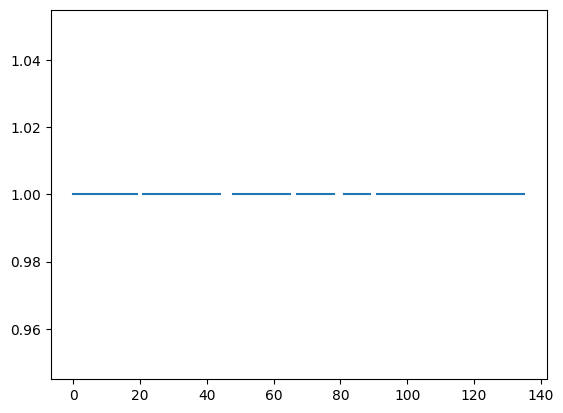

In [99]:
plt.plot(agg.RC.values/b.RC_OF_mean_selected.values)

<AxesSubplot: xlabel='Site_number,Date_time'>

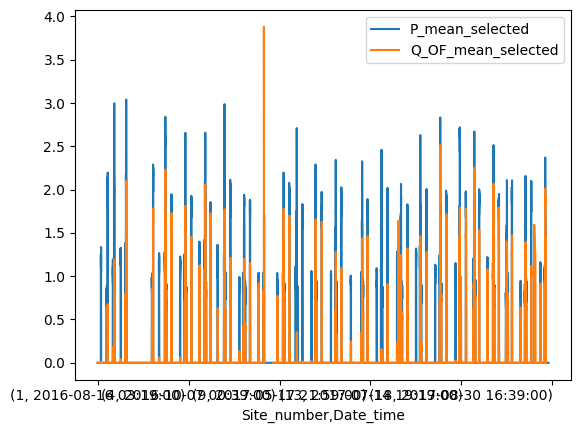

In [84]:
b_time.plot()

In [ ]:
TUBAF = load_sp_datapackage({"sourcedir": "catalogue/temp_1/"})
multitable = load_sp_datapackage({"sourcedir": "catalogue/temp_2/"})
Ries = load_sp_datapackage({"sourcedir": "catalogue/temp_4/"})
view_sp_resource(TUBAF.resources[0], fields = ['SigP'], row_filters = ['SigP >9', 'SigP < 12']).to_pandas()

get_dataset_concepts(TUBAF)
get_sp_data(TUBAF, fielddefinition=[{'name': 'SigP'}])
view = merge_foreign_keys(
    get_sp_data(
        TUBAF,
        fielddefinition=[
            {'name': 'SigP',
             'row_filters': ['No == "8"']
             },
            {'unit': 'g/l',
             'row_filters': ['not sedconc == None', 'No == "8"']
             }
            ]
        )
    )

view = get_sp_data(
    TUBAF,
    fielddefinition=[
        {'name': 'SigP',
         'row_filters': ['SigP > 10']
         },
        {'unit': 'g/l',
         'row_filters': ['not sedconc == None and sedconc >=300']
         }
        ]
    )


view = merge_foreign_keys(
    get_sp_data(
        TUBAF,
        fielddefinition=[
            {'name': 'SigP',
             'row_filters': ['No == "8"']
             },
            {'unit': 'g/l',
             'row_filters': ['not sedconc == None', 'No == "8"']
             }
            ]
        )
    )

try:
    view.extract()
except:
    view.extract()

# model requirements can be defined by row constraints
#from frictionless import validate, checks, transform
#validate(TUBAF.resources[0],
#         checks=[
#             checks.row_constraint(formula="fSi + mSi + cSi == SILT"),
#             checks.row_constraint(formula="fSa + mSa + cSa == SAND"),
#             checks.row_constraint(formula="SILT + SAND + CLAY == 100")
#             ]
#         )
TUBAF.resources[1].to_pandas().head()